# Evaluation Metrics for Binary Classification

Now that you know a couple of clasification algorithm, we will now discuss metrics used to evaluate the algorithm.

To evaluate an algorithm we need to split our data into training and testing data set. We will train the model on a training set and evaluate on a test fit. The reason we do the splitting is to evaluate how well our data generalizes to previously unseen data.

To start off lets focus on binary classification and take a look at confusion matrix:

<div>
<img src="images/confusion_matrix.jpeg" width="500"/>
</div>
Source: <a href="https://medium.com/datadriveninvestor/simplifying-the-confusion-matrix-aa1fa0b0fc35">Source: Simplifying The Confusion Matrix</a>

Accuracy is one of the simplest metric we can get from a confusion matrix.

Accuracy is defined as the number of correct predictions (TP and TN) divided by the number of all samples.

\begin{align}
accuracy = \frac{TP+TN}{TP+TN+FP+FN} 
\end{align}

In [1]:
# suprress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn

%matplotlib inline

/Users/usmanrizwan/.virtualenvs/RPA/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/usmanrizwan/.virtualenvs/RPA/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

Lets build a classifier that always predicts that people are not going to be leaving their job all the time.

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1, weights=(0.2, 0.8))

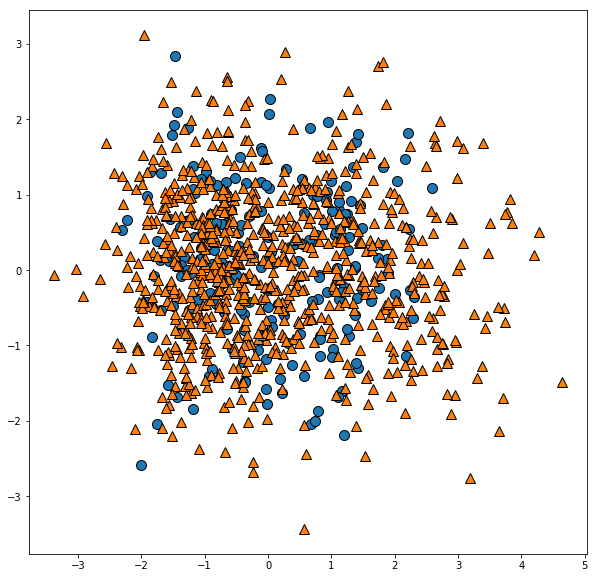

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), )

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)

In [6]:
from sklearn.model_selection import train_test_split
# split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [7]:
predict_yes = [1]*Y_test.shape[0]

In [8]:
from sklearn.metrics import accuracy_score

print('{0}%'.format(100*accuracy_score(Y_test, predict_yes)))

76.0%


The very simple model that we built already has an accuracy of 85.6%. Lets try a Logistic Regression model.

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
log_reg_predict = log_reg.predict(X_test)

In [10]:
print('{0}%'.format(100*accuracy_score(Y_test, log_reg_predict)))

88.0%


According to the accuracy measure the Logistic Regression model is only slightly better than the constant predictor. It could be that Logistic Regression is not a good model so lets try a Decision Tree model.

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,Y_train)
dt_predict = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

print('{0}%'.format(100*accuracy_score(Y_test, dt_predict)))

84.8%


The simple predictor that always predicts 'No' is not the worst performer. This makes it difficult to judge if the algorithms are actually performing well based on the accuracy metric.

Lets take a look at the confusion matrix.

In [13]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print('Always Predict "Yes"')
confusion = confusion_matrix(Y_test, predict_yes)
# I am printing it like this so that it matches the diagram abov
print(np.array([[confusion[1][1], confusion[0][1]], [confusion[1][0], confusion[0][0]]]))

Always Predict "Yes"
[[190  60]
 [  0   0]]


In [14]:
print('Logistic Regression')
confusion = confusion_matrix(log_reg_predict, Y_test)
print(np.array([[confusion[1][1], confusion[0][1]], [confusion[1][0], confusion[0][0]]]))

Logistic Regression
[[183   7]
 [ 23  37]]


In [15]:
print('Decision Tree')
confusion = confusion_matrix(dt_predict, Y_test)
print(np.array([[confusion[1][1], confusion[0][1]], [confusion[1][0], confusion[0][0]]]))

Decision Tree
[[170  20]
 [ 18  42]]


Lets look at other ways to summarize the information that we get from the:

# Precision

Precision is defined as:

\begin{align}
precison = \frac{TP}{TP+FP} 
\end{align}

Precision is used as a performance metric when the goal is to limit the number of false positives (Type I error). 

# Recall

Recall is defined as:

\begin{align}
recall = \frac{TP}{TP+FN} 
\end{align}

Recall is used as the performance metric when it is important to avoid false negatives (Type II error).

For the employee attrition data, it is important to identify all the people who will quit.

Their is a trade-off between accuracy and recall. You can trivially achieve perfect recall by predicting that all samples belong to the positive class. But you will end up with many false positives so the precision will be very low as a result.

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Always Predict "Yes"')
print(precision_score(Y_test, predict_yes))
print(recall_score(Y_test, predict_yes))
print()
print('Logistic Regression')
print(precision_score(Y_test, log_reg_predict))
print(recall_score(Y_test, log_reg_predict))
print()
print('Decision Tree')
print(precision_score(Y_test, dt_predict))
print(recall_score(Y_test, dt_predict))

Always Predict "Yes"
0.76
1.0

Logistic Regression
0.8883495145631068
0.9631578947368421

Decision Tree
0.9042553191489362
0.8947368421052632


A metric that combines the information from precision and recall is called $f$-score.

\begin{align}
F =2* \frac{precision*recall}{precision+recall} 
\end{align}

As it takes precision and recall into account, it can be a better measure than accuracy on imbalanced binary classification datasets. 

In [17]:
from sklearn.metrics import f1_score
print("f1 score for yes: {:.2f}".format(f1_score(Y_test, predict_yes)))
print("f1 score Logistic Regression: {:.2f}".format(f1_score(Y_test, log_reg_predict)))
print("f1 score Decision Tree: {:.2f}".format(f1_score(Y_test, dt_predict)))

f1 score for yes: 0.86
f1 score Logistic Regression: 0.92
f1 score Decision Tree: 0.90


In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict_yes,
 target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.76      1.00      0.86       190

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.58      0.76      0.66       250



# Precision-Recall Curve

One way to change the precision and recall of a model is to adjust the threshold. By default threshold is set at 0.5 in most machine learning libraries.

In sklearn, the precision_recall_curve function returns a list of precision and recall values for all possible thresholds in sorted order.

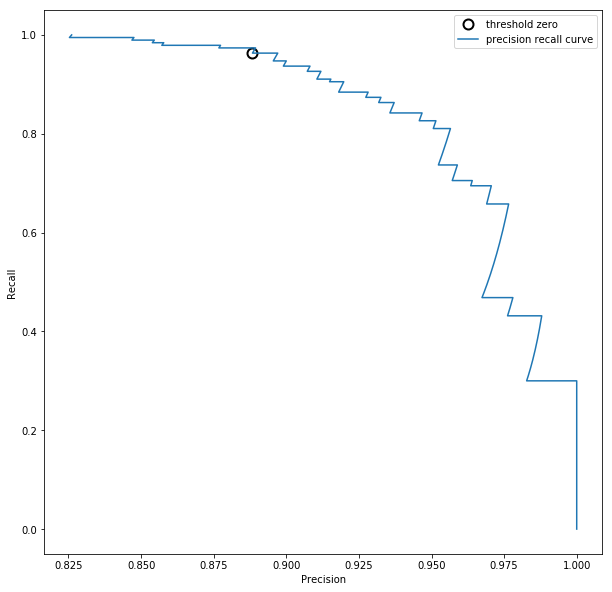

In [19]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
 Y_test, log_reg.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

We can use the precision-recall curve to decide what threshold to use.

# ROC Curve

Another way to evaluate a classification algorithm is to use an ROC (receiver operating characteristic) curve. The ROC curve shows the performance of a classification model at all thresholds. This curve plots two parameters:

\begin{align}
False Positive Rate = \frac{FP}{FP+TN} 
\end{align}

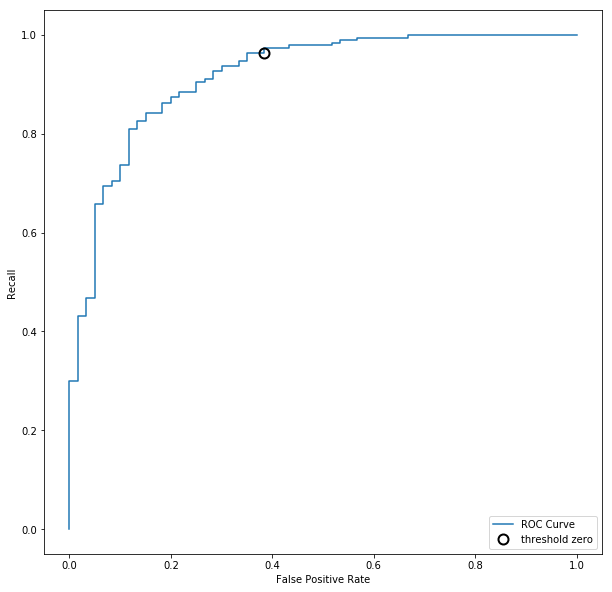

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, log_reg.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("Recall")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

The area under the ROC curve is called AUC-ROC. The bigger the area covered, the better the model is at distinguishing between classes. Ideal value for AUC is 1.

# When to Use Precision-Recall vs. ROC Curves?

Generally:
<li> Use Precision-Recall curve when you have an unbalanced data set.